# Engelborghs2001 model
Simulation of insulin glucose model

In [1]:
%matplotlib inline
from __future__ import print_function, division
import tellurium as te

In [3]:
r = te.loads("Sturis1991Delay_1.xml")
print(r.timeCourseSelections)

['time', 'I', 'G']


In [4]:
# Simulate the system
s = r.simulate(0,500, steps=500)
# r.plot(s)

In [5]:
from matplotlib import pyplot as plt

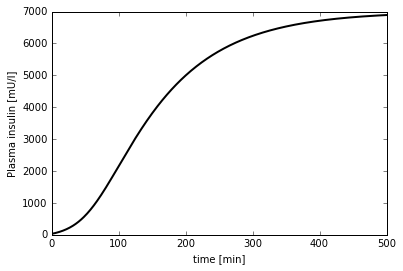

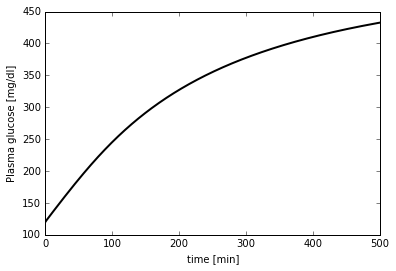

In [8]:
# Plasma insulin
plt.plot(s['time'], s['I']/(r.V1), '-', linewidth=2, color='black')
plt.xlabel('time [min]')
plt.ylabel('Plasma insulin [mU/l]')
# plt.ylim([10, 50])
plt.show()

# Plasma glucose
plt.plot(s['time'], s['G']/(r.V3*10), '-', linewidth=2, color='black')
plt.xlabel('time [min]')
plt.ylabel('Plasma glucose [mg/dl]')
# plt.ylim([100, 160])
plt.show()

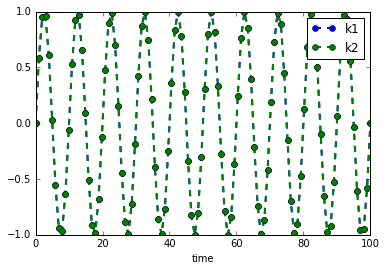

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [49]:
# simple delay model
r2 = te.loada("""
model delay_model()
    T = 10;
    tau = 5;  # delay
    k1 := sin((2*pi/T)*time);
    k2 := delay(k1, tau)
end
""")

r2.timeCourseSelections += ['k1', 'k2']
s2 = r2.simulate(0,100, steps=101)
r2.plot(s2, linestyle='--', marker='o')

In [52]:
print(r2.getAntimony())
r2.exportToSBML(filePath="delay_model.xml", current=False)

// Created by libAntimony v2.9.0
model *delay_model()

  // Assignment Rules:
  k1 := sin((2*pi/T)*time);
  k2 := delay(k1, tau);

  // Variable initializations:
  T = 10;
  tau = 5;

  // Other declarations:
  var k1, k2;
  const T, tau;
end



In [53]:
print(r2.getSBML())

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by libAntimony version v2.9.0 with libSBML version 5.13.1. -->
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model id="delay_model" name="delay_model">
    <listOfParameters>
      <parameter id="T" value="10" constant="true"/>
      <parameter id="tau" value="5" constant="true"/>
      <parameter id="k1" constant="false"/>
      <parameter id="k2" constant="false"/>
    </listOfParameters>
    <listOfRules>
      <assignmentRule variable="k1">
        <math xmlns="http://www.w3.org/1998/Math/MathML">
          <apply>
            <sin/>
            <apply>
              <times/>
              <apply>
                <divide/>
                <apply>
                  <times/>
                  <cn type="integer"> 2 </cn>
                  <pi/>
                </apply>
                <ci> T </ci>
              </apply>
              <csymbol encoding="text" definitionURL="http://www.sbml.org/s